In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# data loading
df = pd.read_csv(r"C:\training.csv")

df

,animal,a1,a2,a3,a4,a5,a6
0,d1,1,0,0,0,0,0
1,d2,1,0,0,1,0,0
2,d3,1,0,0,0,1,0
3,d4,0,0,1,1,0,1
4,d5,0,0,1,1,0,1
5,d6,0,0,1,0,0,1
6,d7,0,1,0,0,0,1
7,d8,0,1,0,0,0,1
8,d9,0,1,0,0,1,1
9,d10,1,0,0,0,0,0


In [3]:
df_new = df.iloc[:, 1:7]

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

df = NormalizeData(df_new)
df

,a1,a2,a3,a4,a5,a6
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,1.0
5,0.0,0.0,1.0,0.0,0.0,1.0
6,0.0,1.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,1.0
8,0.0,1.0,0.0,0.0,1.0,1.0
9,1.0,0.0,0.0,0.0,0.0,0.0


c:\users\o\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  from ipykernel import kernelapp as app
c:\users\o\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  from ipykernel import kernelapp as app
c:\users\o\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  from ipykernel import kernelapp as app


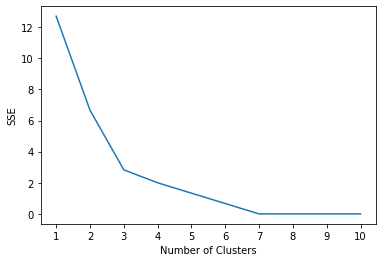

In [4]:
kmeans_kwargs = {
    "init" : "random",
    "n_init": 10,
    "random_state": 1,
}

#lets create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


In [5]:
# Declaring Model
model = KMeans(n_clusters=3, init = 'k-means++', n_init=10, random_state=0)

# Fitting Model
model.fit(df_new.values)

# Prediction on the entire data
all_predictions = model.predict(df_new.values)

# Printing Predictions
# print(predicted_label)
print(all_predictions)

[2 2 2 0 0 0 1 1 1 2]


In [33]:
df_new['cluster'] = model.labels_

print(df_new)

   a1  a2  a3  a4  a5  a6  cluster
0   1   0   0   0   0   0        2
1   1   0   0   1   0   0        2
2   1   0   0   0   1   0        2
3   0   0   1   1   0   1        0
4   0   0   1   1   0   1        0
5   0   0   1   0   0   1        0
6   0   1   0   0   0   1        1
7   0   1   0   0   0   1        1
8   0   1   0   0   1   1        1
9   1   0   0   0   0   0        2


In [34]:
# Predicitng a single input
predicted_label = model.predict([[1, 0 ,  0 ,  0  , 0  , 0]])
predicted_label

array([2])

In [35]:
## weights of each output unit 
model.cluster_centers_

array([[0.00000000e+00, 5.55111512e-17, 1.00000000e+00, 6.66666667e-01,
        0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 5.55111512e-17, 5.55111512e-17,
        3.33333333e-01, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.50000000e-01,
        2.50000000e-01, 0.00000000e+00]])

In [9]:
## test data

df_test = pd.read_csv(r"C:\testing.csv")

df_test
## data normalizaion btw 0 and 1

# remove the animal column/labels
df_test_new = df_test.iloc[:, 1:7]

df_test_new

,a1,a2,a3,a4,a5,a6
0,0,0,1,1,1,1
1,1,0,0,0,1,1
2,0,1,0,1,0,1


In [28]:
# Prediction on the entire test data
all_predictions = model.predict(df_test_new.values)

# Printing Predictions
print(all_predictions)

# output : [0 2 1]

[0 2 1]
